# Change image size

The images in the Flora Danica dataset are large, so you might find it useful to have a script that can resize the images.

The script shows how to resize tif files while preserving the aspect ratio. It retrieves tiff files from one folder and saves them as tiff files in another (source_folder --> destination_folder). It ensures that the destination folder exists and processes up to a specified number of files from the first folder.

In [ ]:
import os
from PIL import Image

def resize_and_store_tiff_files(source_folder, destination_folder, new_size=(100, 100), num_files=10):
    # Ensure that the folder exists
    os.makedirs(destination_folder, exist_ok=True)

    # Create a list of all tiff files
    tiff_files = [f for f in os.listdir(source_folder) if f.lower().endswith('.tif') or f.lower().endswith('.tiff')]

    # Process only specified number of files (num_files=10)
    for tiff_file in tiff_files[:num_files]:
        # Write the path
        source_path = os.path.join(source_folder, tiff_file)
        destination_path = os.path.join(destination_folder, tiff_file)

        # Open, resize and save the image
        with Image.open(source_path) as img:
            # Preserve aspect ratio
            img.thumbnail(new_size, Image.LANCZOS)
            img.save(destination_path, "TIFF")


 
source_folder = r'mekuni_flora_danica_data/sample_data/'
destination_folder = r'mekuni_flora_danica_data/floradanica_resized_images'
resize_and_store_tiff_files(source_folder, destination_folder, new_size=(150, 150))

## Display images in a Jupyter notebook

### A single image

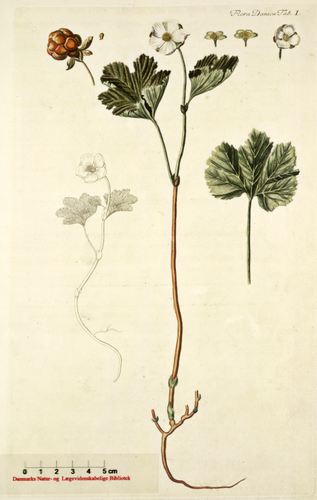

In [ ]:
# Load an image from a file - remember that this path matches this script
image_path = r'mekuni_flora_danica_data/floradanica_mini_sample_set/floradanica_0001.tif'  
image = Image.open(image_path)

# Display the image in a Jupyter notebook
display(image)

### Multiple images

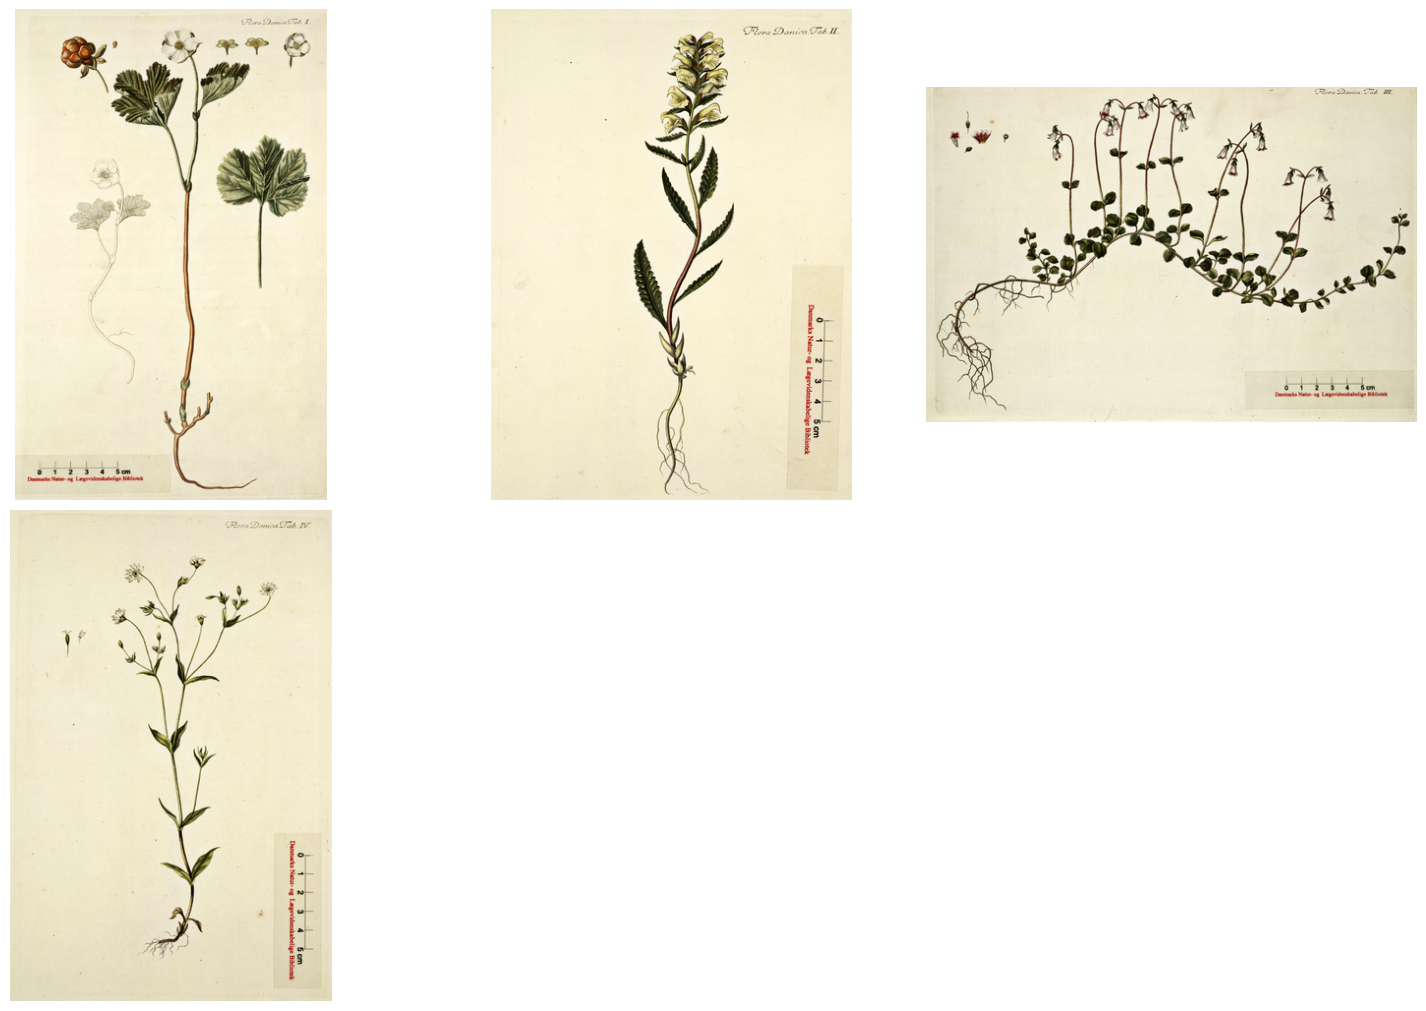

In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Write the path to the folder with images and create a list of files
image_dir = r'mekuni_flora_danica_data/floradanica_mini_sample_set/'  # Replace with your image directory
image_files = [f for f in os.listdir(image_dir) if f.endswith(('.png', '.jpg', '.jpeg', '.tif'))]

# Show the first 4 images
image_files = image_files[:4]

# Create a list to keep track of the images
images = []

# Load the images
for image_file in image_files:
    image_path = os.path.join(image_dir, image_file)
    img = Image.open(image_path)
    images.append(img)

# Set up a grid layout
num_images = len(images)
cols = 3  # Number of columns
rows = (num_images + cols - 1) // cols  # Calculate how many rows are needed

# Build figure and layout
fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows), constrained_layout=True)

# Display the images - use 'off' to hide frames around subplots
for ax, img in zip(axes.flatten(), images):
    ax.imshow(img)
    ax.axis('off')  # Hide axes ticks

# Use 'off' to hide unused subplots, i.e. if the number of images is less than rows times columns
for ax in axes.flatten()[num_images:]:
    ax.axis('off')

# Show the grid of images
plt.show()